In [1]:
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv("D:\\dataset\\data_gd.csv")

In [3]:
data.head(10)

,x,y
0,1,6
1,2,8
2,3,15
3,-1,-3
4,-2,-6
5,-3,-12
6,4,17
7,5,20
8,6,23
9,7,31


In [4]:
X= data.drop(['y'],axis=1)
Y=data['y']

In [5]:
X

,x
0,1
1,2
2,3
3,-1
4,-2
5,-3
6,4
7,5
8,6
9,7


In [6]:
Y

0     6
1     8
2    15
3    -3
4    -6
5   -12
6    17
7    20
8    23
9    31
Name: y, dtype: int64

In [7]:
def percentage_difference(value1, value2):
    return ((value1 - value2)/((value1+value2)/2))*100

In [8]:
def compute_cost(y_pred,y):
    return np.mean((y_pred-y)**2)

In [9]:
def gd(X,y,w1,b,learning_rate,batch_size):
    m=len(y)
    count=0
    j=0
    initial_cost = float('inf')
    tolerance = 0.001
    while True:
        y_pred = w1*X + b
        cost=np.mean((y_pred-y)**2)
        gradient_b = -2*np.mean(y-y_pred)
        gradient_w1 = -2*np.mean((y-y_pred)*X)
        
        w1-=learning_rate*gradient_w1
        b-=learning_rate*gradient_b
        
        percent_diff =abs( percentage_difference(initial_cost,cost))
        if percent_diff<tolerance:
            count+=1
        else:
            count=0
        
        if(j%500==0):
            print("epoch=",j,"w1=",w1,"b=",b,"cost=",cost)
        if(count==10):
            print("epoch=",j,"w1=",w1,"b=",b,"cost=",cost)
            print("Converged!")
            break
        Cost.append(cost)
        initial_cost=cost
        j+=1
        
    return w1,b



X1 = np.array([1,2,3,4])
Y1 = np.array([6,8,15,17])

w1=10
b=10
learning_rate=0.01
Cost=[]
n=len(Y1)
weight, bias = gd(X1,Y1,w1,b,learning_rate,batch_size=n)
print("final updated weight and bias", weight,bias) 

epoch= 0 w1= 8.675 b= 9.53 cost= 598.5
epoch= 500 w1= 3.5615882761538877 b= 2.7889839309642523 cost= 1.5291565683887471
epoch= 1000 w1= 3.902098507086693 b= 1.787842327927706 cost= 1.2639207348403687
epoch= 1326 w1= 3.963163633983533 b= 1.6083034081611605 cost= 1.2519707752131666
Converged!
final updated weight and bias 3.963163633983533 1.6083034081611605


<ipython-input-7-2b67ded65332>:2: RuntimeWarning: invalid value encountered in double_scalars
  return ((value1 - value2)/((value1+value2)/2))*100


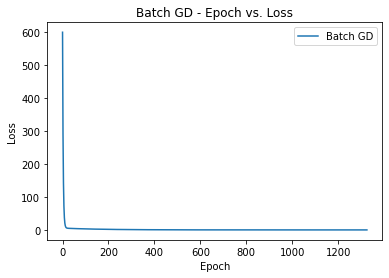

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(len(Cost)), Cost, label='Batch GD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Batch GD - Epoch vs. Loss')
plt.legend()
plt.show()

In [11]:
def sgd(X, y, w1, b, learning_rate, epochs):
    m = len(y)
    tolerance = 0.001
    initial_cost = float('inf')
    count = 0
    w1_set=[]
    b_set=[]
    cost_set=[]
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(0, m)
            x_batch, y_batch = X[random_index], y[random_index]
            
            y_pred = w1 * x_batch + b
            cost = (y_batch - y_pred) ** 2
            
            gradient_b = -2 * (y_batch - y_pred)
            gradient_w1 = -2 * ((y_batch - y_pred) * x_batch)
        
            w1 -= learning_rate * gradient_w1
            b -= learning_rate * gradient_b
            
            w1_set.append(w1)
            b_set.append(b)
            cost_set.append(cost)
            
        Weight.append(w1_set)
        Bias.append(b_set)
        Loss.append(cost_set)
        predictions = w1 * X + b
        avg_cost = np.mean((y - predictions) ** 2)
        
        # Check convergence
        percent_diff = abs((initial_cost - avg_cost) / initial_cost)
        if percent_diff < tolerance:
            count += 1
        else:
            count = 0
        
        if count == 10:
            print("Converged!")
            break
        
        Loss_history.append(avg_cost)
        initial_cost = avg_cost
    print("epoch=",epoch+1,"cost=",avg_cost)
    return w1, b, Weight, Bias, Loss

#X1 = np.array([1, 2, 3, -1, -2, -3, 4, 5, 6, 7])
#Y1 = np.array([6, 8, 15, -3, -6, -12, 17, 20, 23, 31])
X1 = np.array([1,2,3,4])
Y1 = np.array([6,8,15,17])
w1 = 5.9
b = -0.2
learning_rate = 0.01
epochs = 10000
Loss_history=[]
Weight=[]
Bias=[]
Loss=[]
sto_weight, sto_bias,Weight, Bias, Loss = sgd(X1, Y1, w1, b, learning_rate, epochs)
print("final updated weight and bias:", sto_weight, sto_bias)


<ipython-input-11-b4e2c1a79443>:34: RuntimeWarning: invalid value encountered in double_scalars
  percent_diff = abs((initial_cost - avg_cost) / initial_cost)


epoch= 10000 cost= 1.2675260372890413
final updated weight and bias: 4.010266101912092 1.3424473074993597


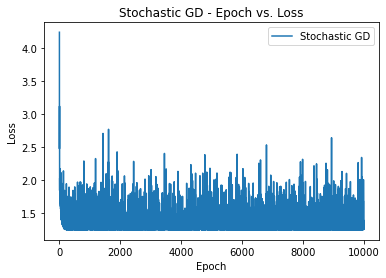

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(len(Loss_history)), Loss_history, label='Stochastic GD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Stochastic GD - Epoch vs. Loss')
plt.legend()
plt.show()

In [13]:
def mini_batch_gd(X, y, w1, b, learning_rate, batch_size, epochs):
    m = len(y)
    tolerance = 0.001
    initial_cost = float('inf')
    count = 0
    
    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            x_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
            
            y_pred = np.dot(x_batch, w1) + b
            cost = np.mean((y_batch - y_pred) ** 2)
            
            gradient_b = -2 * np.mean(y_batch - y_pred)
            gradient_w1 = -2 * np.dot(x_batch.T, (y_batch - y_pred)) / batch_size

            w1 -= learning_rate * gradient_w1
            b -= learning_rate * gradient_b
        
        predictions = w1*X + b
        avg_cost = np.mean((y - predictions) ** 2)
        
        # Check convergence
        percent_diff = abs(percentage_difference(initial_cost,avg_cost))
        if percent_diff < tolerance:
            count += 1
        else:
            count = 0
        
        if count == 10:
            print("Converged!")
            break
        Cost_mb.append(avg_cost)
        initial_cost = avg_cost
    print("epoch=",epoch,"cost=",avg_cost)
    return w1, b


# Example usage
#X1 = np.array([1, 2, 3, -1, -2, -3, 4, 5, 6, 7])
#Y1 = np.array([6, 8, 15, -3, -6, -12, 17, 20, 23, 31])
X1 = np.array([1,2,3,4])
Y1 = np.array([6,8,15,17])
# Initialize w1 as a column vector with shape (num_features, 1)
w1 = 10
b = 10  # Initial bias
learning_rate = 0.002
batch_size = 2
epochs = 5000  # Adjust as needed
Cost_mb=[]
# Call mini-batch gradient descent function
minibatch_weight, minibatch_bias = mini_batch_gd(X1, Y1, w1, b, learning_rate, batch_size, epochs)
print("Final updated weight and bias:", minibatch_weight, minibatch_bias)


Converged!
epoch= 2875 cost= 1.2548976329379768
Final updated weight and bias: 3.9474322719617234 1.669411758805179


<ipython-input-7-2b67ded65332>:2: RuntimeWarning: invalid value encountered in double_scalars
  return ((value1 - value2)/((value1+value2)/2))*100


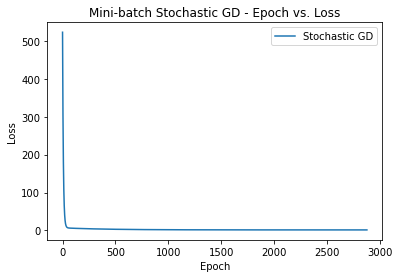

In [16]:
plt.plot(range(len(Cost_mb)), Cost_mb, label='Mini-batch Stochastic GD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Mini-batch Stochastic GD - Epoch vs. Loss')
plt.legend()
plt.show()